## Run the dta on different link files

In [65]:
import shutil
import os
import numpy as np

name_list = ['ctm', 'ltm', 'pq', 'lq']
target_file_name = 'MNM_input_link'
executable_name = 'exp_link'
output_name = 'cc_record'

In [115]:
for file_name in name_list:
    shutil.copy2(target_file_name + '_' + file_name, target_file_name)
    os.system('./' + executable_name)
    os.rename(output_name, output_name+'_'+file_name)

## Extract the cumulative curve info

In [116]:
total_dict = dict()
for name in name_list:
    info_dict = dict()
    f = file(output_name + '_' + name, 'r')
    for line in f:
        words = line.split(',')
        link_ID = words[0]
        direction = words[1]
        key = link_ID + "_" + direction
        value = (list(), list())
        for e in words[2:]:
            one_value = e.split(":")
            value[0].append(np.float(one_value[0]))
            value[1].append(np.float(one_value[1]))
        info_dict[key] = value
    f.close()
    total_dict[name] = info_dict

## Plotting

In [103]:
import matplotlib.pyplot as plt


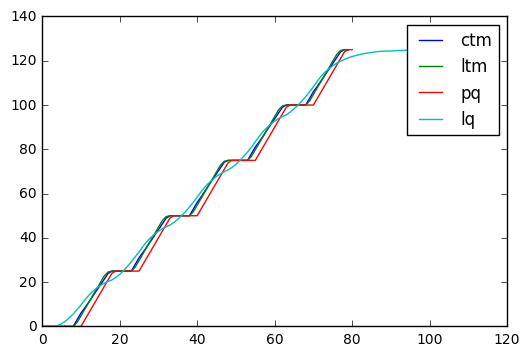

In [118]:
link_name = '3_out'
# plt.subplot(2, 2, 1)
plt.plot(total_dict['ctm'][link_name][0], total_dict['ctm'][link_name][1])
# plt.subplot(2, 2, 2)
plt.plot(total_dict['ltm'][link_name][0], total_dict['ltm'][link_name][1])
# plt.subplot(2, 2, 3)
plt.plot(total_dict['pq'][link_name][0], total_dict['pq'][link_name][1])
# plt.subplot(2, 2, 4)
plt.plot(total_dict['lq'][link_name][0], total_dict['lq'][link_name][1])
plt.legend(name_list)
plt.show()

All 25 demand is interesting since it related to wavy curve.